<div style="text-align: left; background-color:#4e4e4e; font-family: Trebuchet MS; color:white; padding: 12px; line-height:1.25;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 38px;border-style: solid;border-color: dark green;">Heart Diseases: What are the indicators?</div>

<br> </br>
<div>    

<img src="https://images2.minutemediacdn.com/image/upload/c_fill,w_1080,ar_16:9,f_auto,q_auto,g_auto/shape%2Fcover%2Fsport%2F535618-istock-819924240-2470f65174198a2b48b33619995f99ad.jpg" width="550/">    
</div>

<div style="text-align: left; background-color:#4e4e4e; font-family: Trebuchet MS; color:white; padding: 12px; line-height:1.25;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 12px;border-style: solid;border-color: dark green;"><p><b><a href="https://www.mentalfloss.com/article/535618/super-ekg-could-diagnose-heart-disease-90-seconds" target="">Image source</a></b></p></div>


# 0. **简介** <a class="anchor" id="0"></a>
"心脏病，也被称为心血管疾病，是用于描述影响心脏和循环系统的疾病和病状的广义术语。它是全球主要的致残原因。由于心脏是身体最重要的器官之一，其疾病也会影响身体的其他器官和部位。心脏疾病有很多不同的类型和形式。最常见的疾病会导致冠状动脉狭窄或阻塞，心脏瓣膜功能失常，心脏大小增大，以及其他引发**心力衰竭**和**心脏病发作**的疾病。" [[来源](https://www.indushealthplus.com/heart-diseases.html)]

#### **目标**
这个笔记本有两个主要目标：
* 使用探索性数据分析（EDA）探索心脏病数据集
* 使用分类算法进行预测（建模）
---

<a id="top"></a>

## **Table of Contents**

* [0. Introduction](#0)
* [1. Exploratory Data Analysis](#1)
    * [1.1 Data Dictionary](#1.1)
    * [1.2 Data Pre-processing](#1.2)
    * [1.3 Exploring Features](#1.3)
    * [1.4 Correlations Heatmap](#1.4)
    * [1.5 EDA Summary](#1.5)
* [2. Predictions](#2)
    * [2.1 Scikit Learn Classifiers](#2.1)
* [3. Concluding Remarks](#3)

---
# 1. **Exploratory Data Analysis** <a class="anchor" id="1"></a>
---

In [1]:
import warnings

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from IPython.core.display import HTML
from scipy import stats
from scipy.stats import uniform

warnings.filterwarnings("ignore")

import os

# for dirname, _, filenames in os.walk('/kaggle/input'):
#    for filename in filenames:
#        print(os.path.join(dirname, filename))

In [2]:
data = pd.read_csv("heart.csv")
print("Shape of the data is ", data.shape)

Shape of the data is  (303, 14)


In [3]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
data.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

**注意**：从数据类型中我们可以看到所有的特征都是`int64/float64`。但这是因为一些分类特征包括目标（有病/无病）已经为我们标签编码了。在下面的部分中，我们将看到特征的详细解释。

---
## 1.1 **数据字典** <a class="anchor" id="1.1"></a>

1. age: 年龄，以年为单位
2. sex: 性别
    * 1 = 男性
    * 0 = 女性
3. cp: 胸痛类型
    * 值 0：典型心绞痛
    * 值 1：非典型心绞痛
    * 值 2：非心绞痛
    * 值 3：无症状
4. trestbps: 静息血压（入院时以mm Hg计）
5. chol: 血清胆固醇（以mg/dl计）
6. fbs: （空腹血糖 > 120 mg/dl）
    * 1 = 真实； 
    * 0 = 错误
7. restecg: 静息心电图结果
    * 值 0: 正常
    * 值 1: 出现ST-T波异常（T波倒置和/或ST段升高或降低 > 0.05 mV）
    * 值 2: 根据Estes'标准显示可能或明确的左心室肥大
8. thalach: 达到的最大心率
9. exang: 运动引发的心绞痛
    * 1 = 是
    * 0 = 否
10. oldpeak = 相对于休息状态，运动引发的ST段压低
11. slope: 运动峰值ST段的坡度
    * 值 0: 上升
    * 值 1: 平坦
    * 值 2: 下降
12. ca: 主要血管（0-3个）的荧光透视着色数量
13. thal: 
    * 0 = `错误（在原始数据集中，0对应NaN）`
    * 1 = 固定缺陷
    * 2 = 正常 
    * 3 = 可逆性缺陷 
14. target (标签)： 
    * 0 = 无疾病， 
    * 1 = 有疾病
---    
**关于目标标签的注意事项**:

`心脏病诊断（血管造影病情）
值 0: < 50%直径狭窄
值 1: > 50%直径狭窄`
    
**来自数据集讨论论坛的备注**：

* 数据 #93，159，164，165和252的`ca=4`是错误的。在原始的克利夫兰数据集中，它们是NaNs。
* 数据 #49和282的`thal = 0`，也是错误的。它们在原始数据集中也是NaNs。

**行动**： 删除有错误的数据！（将删除7个数据条目）

---

<a href="#top">☝️返回顶部</a>

## 1.2 **数据预处理** <a class="anchor" id="1.2"></a>
### 1.2.1 删除错误的数据
基于我们以上的调查，我们将删除7行数据。

In [ ]:
data = data[data["ca"] < 4]  # 删除错误的ca值
data = data[data["thal"] > 0]  # 删除错误的thal值
print(f"现在的数据长度是{len(data)}，而不是303！")

### 1.2.2 重命名列以便于理解
* 数据集中的特征名称都被缩写了，很难理解它们的含义。对我们大多数人来说，完整的医学/技术名称都很难理解，更不用说它们的简称了。因此，为了让它们更易于阅读，我们将在这里使用来自UCL数据存储库的信息更改数据帧的列名。
* 我们还将编码的类别（0，1，2，..）替换为其医学含义（例如，'非典型心绞痛'，'典型心绞痛'等）
* **注意**：我借用了[Rob Harrand's](https://www.kaggle.com/tentotheminus9/what-causes-heart-disease-explaining-the-model)重新命名列的想法。

In [6]:
data = data.rename(
    columns={
        "cp": "chest_pain_type",
        "trestbps": "resting_blood_pressure",
        "chol": "cholesterol",
        "fbs": "fasting_blood_sugar",
        "restecg": "resting_electrocardiogram",
        "thalach": "max_heart_rate_achieved",
        "exang": "exercise_induced_angina",
        "oldpeak": "st_depression",
        "slope": "st_slope",
        "ca": "num_major_vessels",
        "thal": "thalassemia",
    },
    errors="raise",
)

In [7]:
data["sex"][data["sex"] == 0] = "female"
data["sex"][data["sex"] == 1] = "male"

data["chest_pain_type"][data["chest_pain_type"] == 0] = "typical angina"
data["chest_pain_type"][data["chest_pain_type"] == 1] = "atypical angina"
data["chest_pain_type"][data["chest_pain_type"] == 2] = "non-anginal pain"
data["chest_pain_type"][data["chest_pain_type"] == 3] = "asymptomatic"

data["fasting_blood_sugar"][data["fasting_blood_sugar"] == 0] = "lower than 120mg/ml"
data["fasting_blood_sugar"][data["fasting_blood_sugar"] == 1] = "greater than 120mg/ml"

data["resting_electrocardiogram"][data["resting_electrocardiogram"] == 0] = "normal"
data["resting_electrocardiogram"][
    data["resting_electrocardiogram"] == 1
] = "ST-T wave abnormality"
data["resting_electrocardiogram"][
    data["resting_electrocardiogram"] == 2
] = "left ventricular hypertrophy"

data["exercise_induced_angina"][data["exercise_induced_angina"] == 0] = "no"
data["exercise_induced_angina"][data["exercise_induced_angina"] == 1] = "yes"

data["st_slope"][data["st_slope"] == 0] = "upsloping"
data["st_slope"][data["st_slope"] == 1] = "flat"
data["st_slope"][data["st_slope"] == 2] = "downsloping"

data["thalassemia"][data["thalassemia"] == 1] = "fixed defect"
data["thalassemia"][data["thalassemia"] == 2] = "normal"
data["thalassemia"][data["thalassemia"] == 3] = "reversable defect"

In [8]:
data.dtypes

age                            int64
sex                           object
chest_pain_type               object
resting_blood_pressure         int64
cholesterol                    int64
fasting_blood_sugar           object
resting_electrocardiogram     object
max_heart_rate_achieved        int64
exercise_induced_angina       object
st_depression                float64
st_slope                      object
num_major_vessels              int64
thalassemia                   object
target                         int64
dtype: object

In [9]:
data.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,resting_electrocardiogram,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
0,63,male,asymptomatic,145,233,greater than 120mg/ml,normal,150,no,2.3,upsloping,0,fixed defect,1
1,37,male,non-anginal pain,130,250,lower than 120mg/ml,ST-T wave abnormality,187,no,3.5,upsloping,0,normal,1
2,41,female,atypical angina,130,204,lower than 120mg/ml,normal,172,no,1.4,downsloping,0,normal,1
3,56,male,atypical angina,120,236,lower than 120mg/ml,ST-T wave abnormality,178,no,0.8,downsloping,0,normal,1
4,57,female,typical angina,120,354,lower than 120mg/ml,ST-T wave abnormality,163,yes,0.6,downsloping,0,normal,1


### 1.2.3 特征分组（按数据类型）
* 如我们上面所看到的，有三种数据类型，即**对象**，**整数**和**浮点数**。让我们按类型进行分组。

In [10]:
# numerical fearures 6
num_feats = [
    "age",
    "cholesterol",
    "resting_blood_pressure",
    "max_heart_rate_achieved",
    "st_depression",
    "num_major_vessels",
]
# categorical (binary)
bin_feats = ["sex", "fasting_blood_sugar", "exercise_induced_angina", "target"]
# caterorical (multi-)
nom_feats = ["chest_pain_type", "resting_electrocardiogram", "st_slope", "thalassemia"]
cat_feats = nom_feats + bin_feats

## 1.3 **探索特征/目标** <a class="anchor" id="1.3"></a>

在这一部分，我们将详细研究所有的特征（包括目标）。我们将查看可能的统计摘要以及其中一些特征的分布情况，从目标开始。

### 1.3.1 目标分布
 
我们观察到目标是相当平衡的，约46%无心脏疾病，约54%有心脏疾病。所以无需担心目标不平衡。

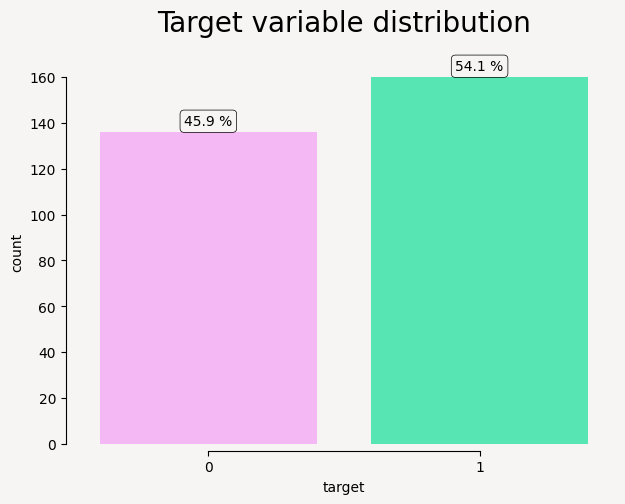

In [11]:
mypal = ["#FC05FB", "#FEAEFE", "#FCD2FC", "#F3FEFA", "#B4FFE4", "#3FFEBA"]

plt.figure(figsize=(7, 5), facecolor="#F6F5F4")
total = float(len(data))
ax = sns.countplot(x=data["target"], palette=mypal[1::4])
ax.set_facecolor("#F6F5F4")

for p in ax.patches:
    height = p.get_height()
    ax.text(
        p.get_x() + p.get_width() / 2.0,
        height + 3,
        "{:1.1f} %".format((height / total) * 100),
        ha="center",
        bbox=dict(facecolor="none", edgecolor="black", boxstyle="round", linewidth=0.5),
    )

ax.set_title("Target variable distribution", fontsize=20, y=1.05)
sns.despine(right=True)
sns.despine(offset=5, trim=True)

### 1.3.2 数值特征

#### 统计摘要

对于数值特征，我们可以应用方便的pandas `data.describe()` 方法并获取全局统计摘要。下面突出显示了关键数据。

In [12]:
data[num_feats].describe().T

,count,mean,std,min,25%,50%,75%,max
age,296.0,54.523649,9.059471,29.0,48.0,56.0,61.00,77.0
cholesterol,296.0,247.155405,51.977011,126.0,211.0,242.5,275.25,564.0
resting_blood_pressure,296.0,131.604730,17.726620,94.0,120.0,130.0,140.00,200.0
max_heart_rate_achieved,296.0,149.560811,22.970792,71.0,133.0,152.5,166.00,202.0
st_depression,296.0,1.059122,1.166474,0.0,0.0,0.8,1.65,6.2
num_major_vessels,296.0,0.679054,0.939726,0.0,0.0,0.0,1.00,3.0


### **数值特征的统计摘要**

<blockquote style="margin-right:auto; margin-left:auto; color:white; background-color: #4e4e4e; padding: 1em; margin:24px;">
   
<ul>
<li> <font color="white" size=+1.0><b>年龄</b></font> :
    <ul>
    <li> 数据集中的平均年龄是54.5岁
    <li> 最大的是77岁，最小的是29岁
    </ul>
<li> <font color="white" size=+1.0><b>胆固醇：</b></font>
    <ul>
    <li> 注册的平均胆固醇水平是247.15
    <li> 最高水平是564，最低水平是126。 
    <li> <strong>注意</strong>：根据[6]，健康的胆固醇水平是$<200 mg/dl$，通常高水平的胆固醇与心脏病有关。
    </ul>
<li> <font color="white" size=+1.0><b>静息血压：</b></font>
    <ul>
    <li> 平均值131，最大值200，最小值94
    </ul>
<li> <font color="white" size=+1.0><b>最大心率：</b></font>
    <ul>
    <li> 注册的平均最大心率是149.5 bpm。最大值和最小值分别为202和71bpm。 
    </ul>
<li> <font color="white" size=+1.0><b>ST段压低：</b></font>
    <ul>
    <li> st_dpression的平均值是1.06。最大值是6.2，最小值是0。
    </ul>
<li> <font color="white" size=+1.0><b>主要血管的数量：</b></font>
    <ul>
    <li> 观察到最多3个，最少0个主要血管。平均值是0.68。
    </ul>
</ul>                                                                                                                                             
</blockquote>

<a href="#top">☝️ 返回顶部</a>

#### 分布：密度图

#### Distribution: Density plots

Text(0.5, 0.98, 'Distribution of Numerical Features')

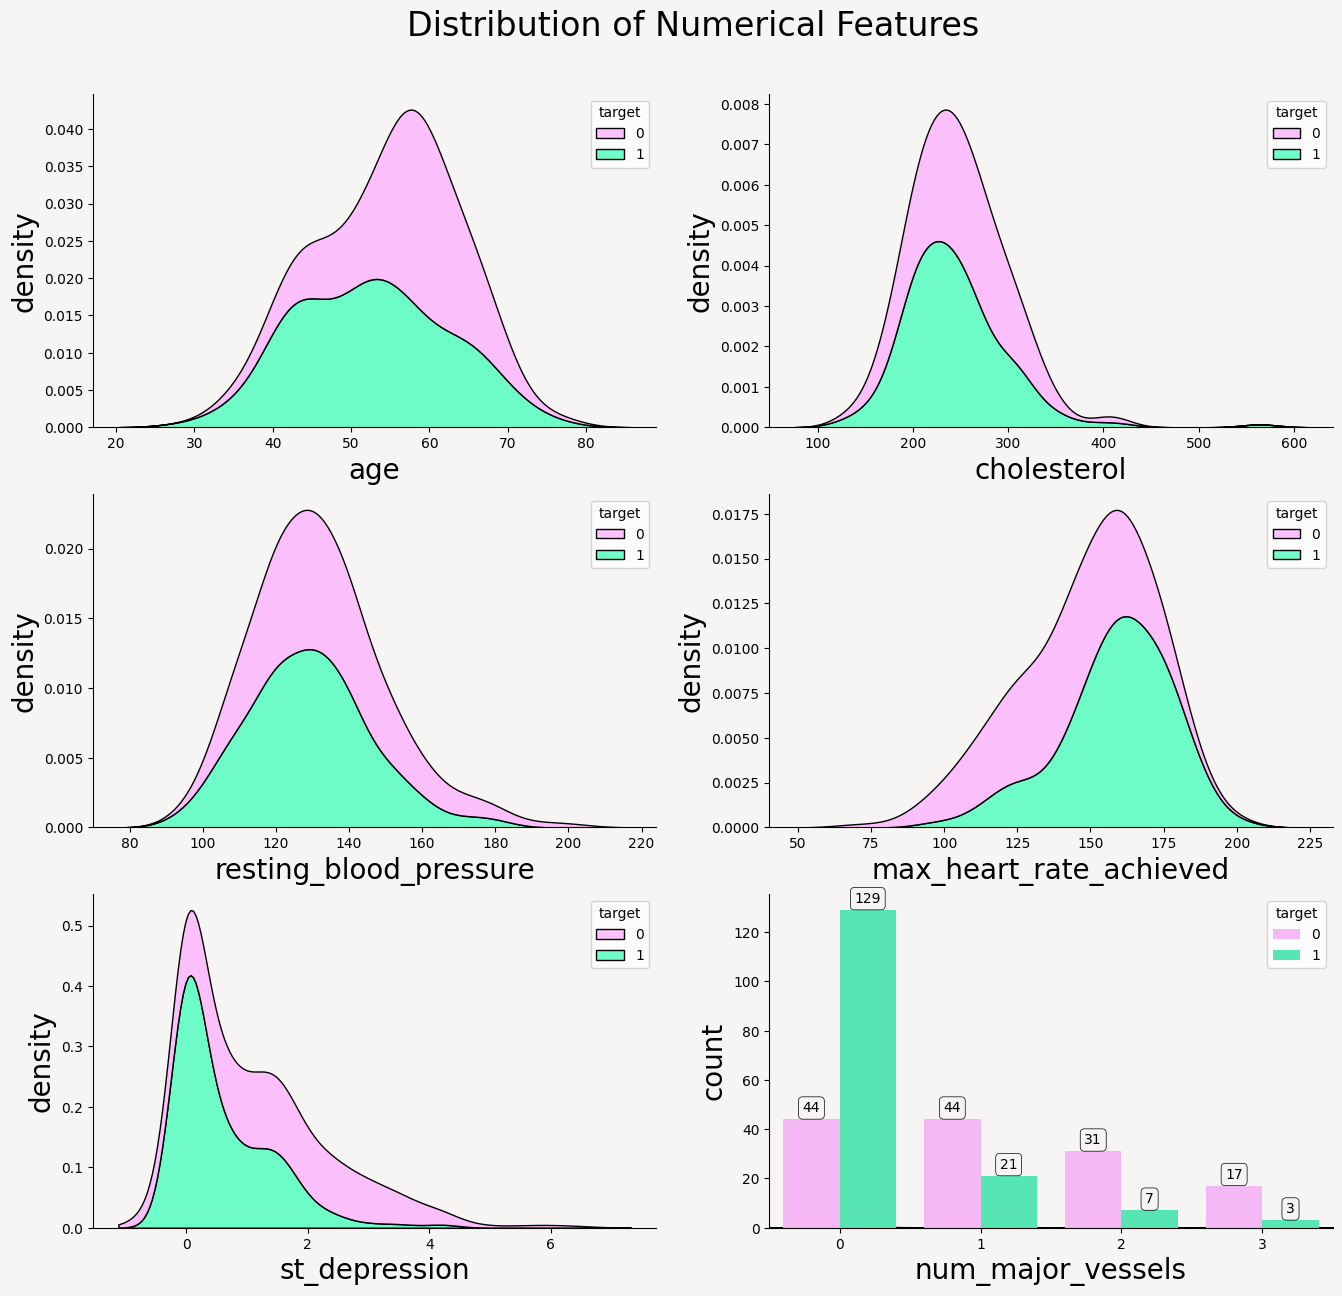

In [13]:
L = len(num_feats)
ncol = 2
nrow = int(np.ceil(L / ncol))
# remove_last= (nrow * ncol) - L

fig, ax = plt.subplots(nrow, ncol, figsize=(16, 14), facecolor="#F6F5F4")
fig.subplots_adjust(top=0.92)

i = 1
for col in num_feats:
    plt.subplot(nrow, ncol, i, facecolor="#F6F5F4")

    ax = sns.kdeplot(
        data=data, x=col, hue="target", multiple="stack", palette=mypal[1::4]
    )
    ax.set_xlabel(col, fontsize=20)
    ax.set_ylabel("density", fontsize=20)
    sns.despine(right=True)
    sns.despine(offset=0, trim=False)

    if col == "num_major_vessels":
        sns.countplot(data=data, x=col, hue="target", palette=mypal[1::4])
        for p in ax.patches:
            height = p.get_height()
            ax.text(
                p.get_x() + p.get_width() / 2.0,
                height + 3,
                "{:1.0f}".format((height)),
                ha="center",
                bbox=dict(
                    facecolor="none", edgecolor="black", boxstyle="round", linewidth=0.5
                ),
            )

    i = i + 1
plt.suptitle("Distribution of Numerical Features", fontsize=24)

#### Pair-plots

Text(0.5, 0.98, 'Pairplot: Numerical Features ')

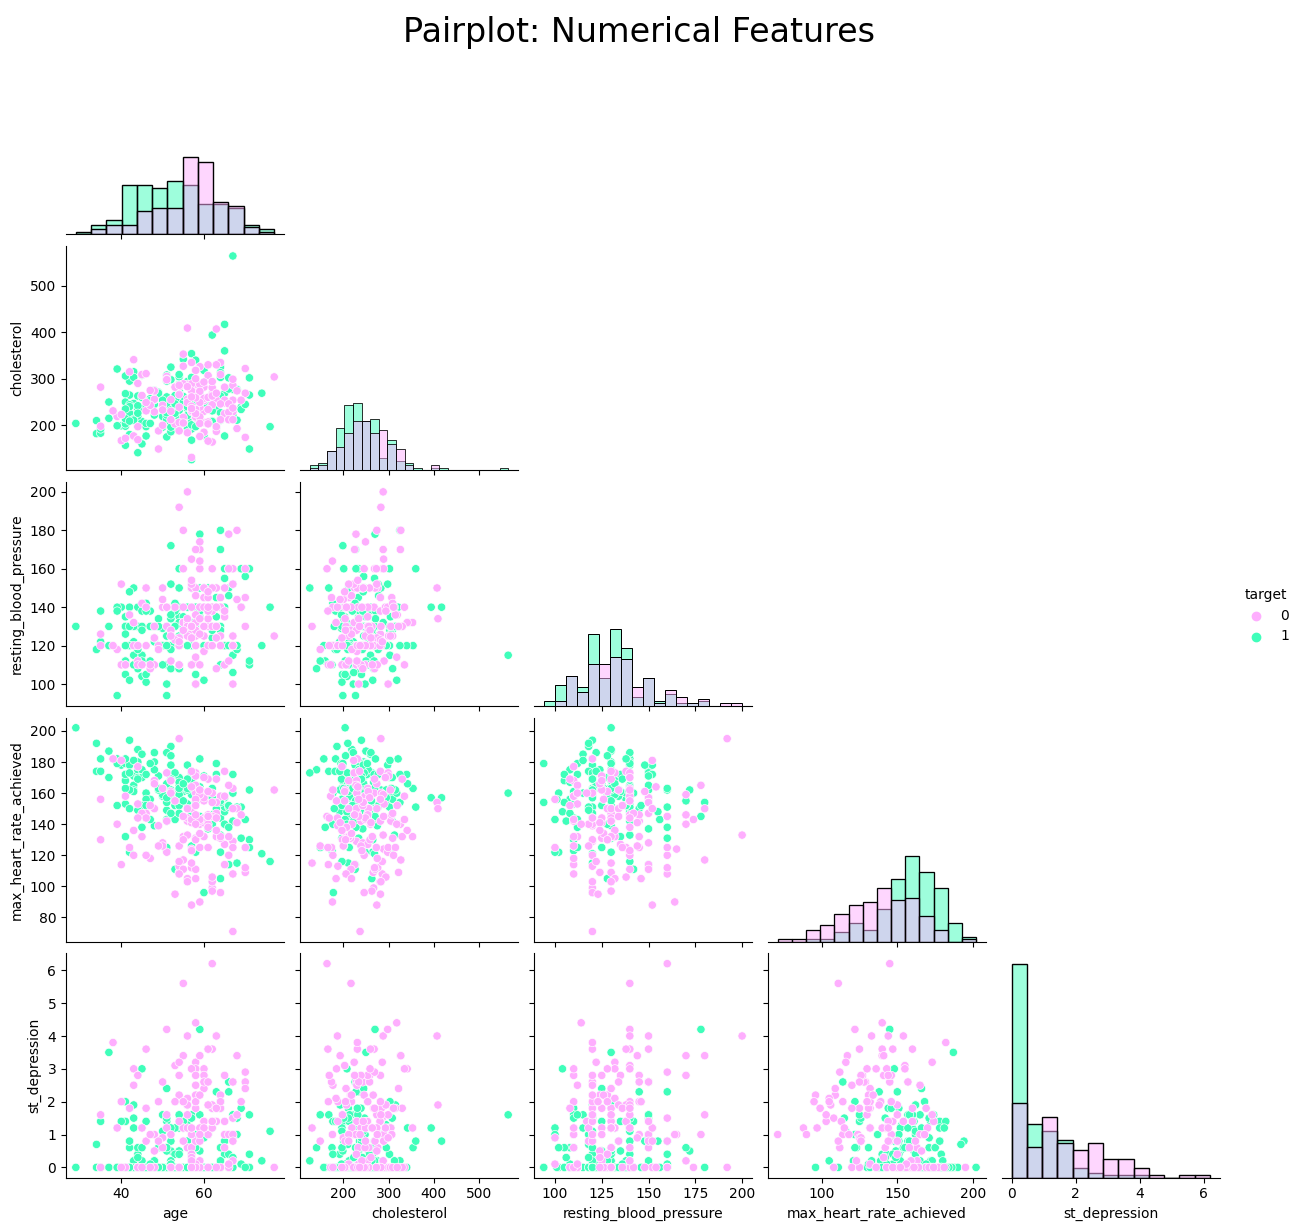

In [14]:
_ = [
    "age",
    "cholesterol",
    "resting_blood_pressure",
    "max_heart_rate_achieved",
    "st_depression",
    "target",
]
data_ = data[_]
g = sns.pairplot(
    data_, hue="target", corner=True, diag_kind="hist", palette=mypal[1::4]
)
plt.suptitle("Pairplot: Numerical Features ", fontsize=24)

#### 选定特征

以下是一些选定特征的reg-plots，显示了它们与年龄的线性关系，类似于上面配对图的第一列。我们观察到：
- 除了`maximum_heart_rate_achieved`外，其他特征都与`age`呈正线性关系（尽管与`st_depression`的关系较弱）。
- 较年轻的患者，如果`maximum_heart_rate_achieved`较高，更可能患有心脏病。
- 无论年龄大小，`st_depression`较低也可能表明患有心脏病。

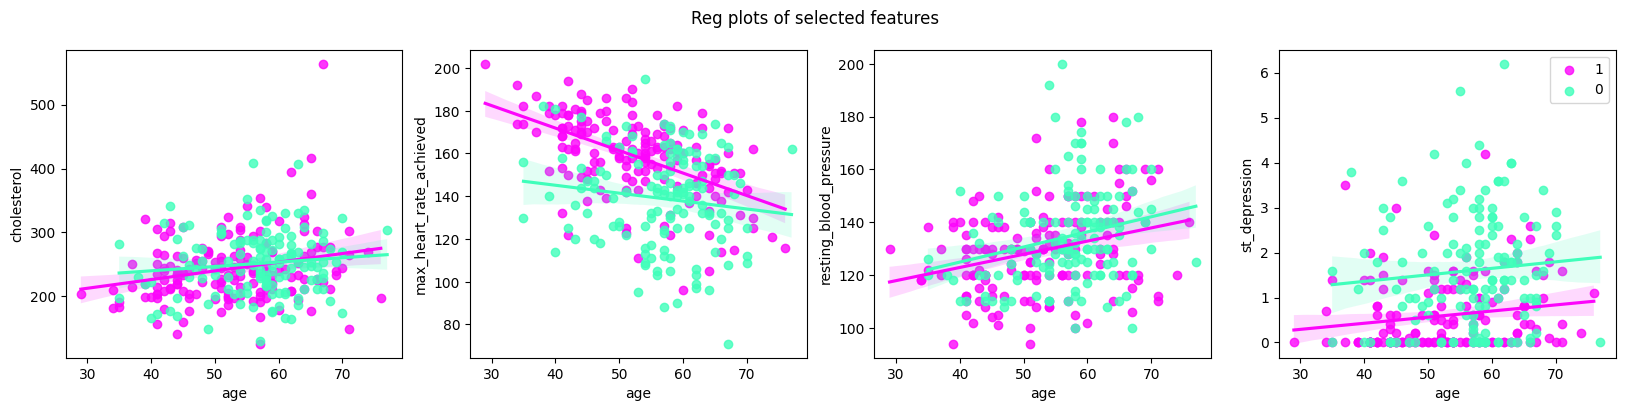

In [15]:
fig, ax = plt.subplots(1, 4, figsize=(20, 4))
sns.regplot(
    data=data[data["target"] == 1],
    x="age",
    y="cholesterol",
    ax=ax[0],
    color=mypal[0],
    label="1",
)
sns.regplot(
    data=data[data["target"] == 0],
    x="age",
    y="cholesterol",
    ax=ax[0],
    color=mypal[5],
    label="0",
)
sns.regplot(
    data=data[data["target"] == 1],
    x="age",
    y="max_heart_rate_achieved",
    ax=ax[1],
    color=mypal[0],
    label="1",
)
sns.regplot(
    data=data[data["target"] == 0],
    x="age",
    y="max_heart_rate_achieved",
    ax=ax[1],
    color=mypal[5],
    label="0",
)
sns.regplot(
    data=data[data["target"] == 1],
    x="age",
    y="resting_blood_pressure",
    ax=ax[2],
    color=mypal[0],
    label="1",
)
sns.regplot(
    data=data[data["target"] == 0],
    x="age",
    y="resting_blood_pressure",
    ax=ax[2],
    color=mypal[5],
    label="0",
)
sns.regplot(
    data=data[data["target"] == 1],
    x="age",
    y="st_depression",
    ax=ax[3],
    color=mypal[0],
    label="1",
)
sns.regplot(
    data=data[data["target"] == 0],
    x="age",
    y="st_depression",
    ax=ax[3],
    color=mypal[5],
    label="0",
)
plt.suptitle("Reg plots of selected features")
plt.legend()

### 1.3.3 类别特征

我们使用计数图来可视化目标变量相对于不同类别。我们可以注意到的两件事是数据集中每个类别的分布以及它们对目标变量正确预测的贡献，即是否有疾病（=1）或没有疾病（=0）。以下是类别特征的总结。

<blockquote style="margin-right:auto; margin-left:auto; color:white; background-color: #4e4e4e; padding: 1em; margin:24px;">
   
<ul>
<li> <font color="white" size=+1.0><b>胸痛：</b></font>
    <ul>
        <li> 超过75%的患者经历了<strong><em>典型的心绞痛</em></strong>或<strong><em>非心绞痛</em></strong>的胸痛。
        <li> 那些经历过<em>非典型心绞痛</em>或<strong>非心绞痛</strong>的患者更有可能患有心脏病。
    </ul>  
    
<li> <font color="white" size=+1.0><b>静息心电图：</b></font>
    <ul>
        <li> 患有<strong>左心室肥大</strong>的患者最少（~1.4%）。其余的几乎是<strong>ST-T异常</strong>和正常REC测试的患者之间的50-50分割。
        <li> <strong>ST-T异常</strong> 似乎与目标有更好的相关性，即大多数进行此类REC测试的患者最终患有心脏病。
</ul>    
<li> <font color="white" size=+1.0><b>ST坡度：</b></font>
    <ul>
    <li> 大多数患者的REC测试的ST坡度为<strong>下坡</strong>或<strong>平坦</strong>。
    <li> <strong>下坡</strong>的ST坡度是患者可能患有心脏病的强烈指示。 
</ul>   
    
<li> <font color="white" size=+1.0><b>地中海贫血：</b></font>
    <ul>
    <li> 大多数患者的地中海贫血为<strong>正常</strong>或<strong>可逆缺陷</strong>
    <li> 患有地中海贫血缺陷的患者（可逆 + 固定）不太可能患有心脏病。然而，那些地中海贫血正常的患者更有可能患有心脏病。这听起来并不直观。
</ul>   
    
<li> <font color="white" size=+1.0><b>空腹血糖</b></font>
    <ul>
    <li> 我们数据集中的大多数患者（约85%的样本）的空腹血糖较低（少于120mg/ml）。
    <li> 拥有较低的静息血糖倾向于增加患有心脏病的机会（~54%）。
</ul>   
    
<li> <font color="white" size=+1.0><b>运动诱发的心绞痛</b></font>
    <ul>
    <li> 三分之二的患者没有显示出运动诱发的心绞痛。
    <li> 76%的患有运动诱发心绞痛的患者没有心脏病。然而，~69%的没有经历过运动诱发心绞痛的患者被诊断为患有心脏病。
</ul> 
    
<li> <font color="white" size=+1.0><b>性别</b></font>
    <ul>
    <li> 样本数据中的患者大多是男性。
    <li> 女性似乎比男性更多地患有心脏病。
</ul>   
    
</ul>                                                                                                                                             
</blockquote>

<!-- def cat_freq_counter(df, columns):
    dataFrames_ = []
    for col in columns:
        dataFrames_.append(pd.DataFrame(df[col].value_counts()).style.background_gradient(cmap='cool'))
    return HTML(f"<table><tr> {''.join(['<td>' + dfs._repr_html_() + '</td>' for dfs in dataFrames_])} </tr></table>")

# split the width of the output 
display(cat_freq_counter(data, cat_feats[0:4]))
display(cat_freq_counter(data, cat_feats[4:])) -->

#### Distribution: Count plots

0

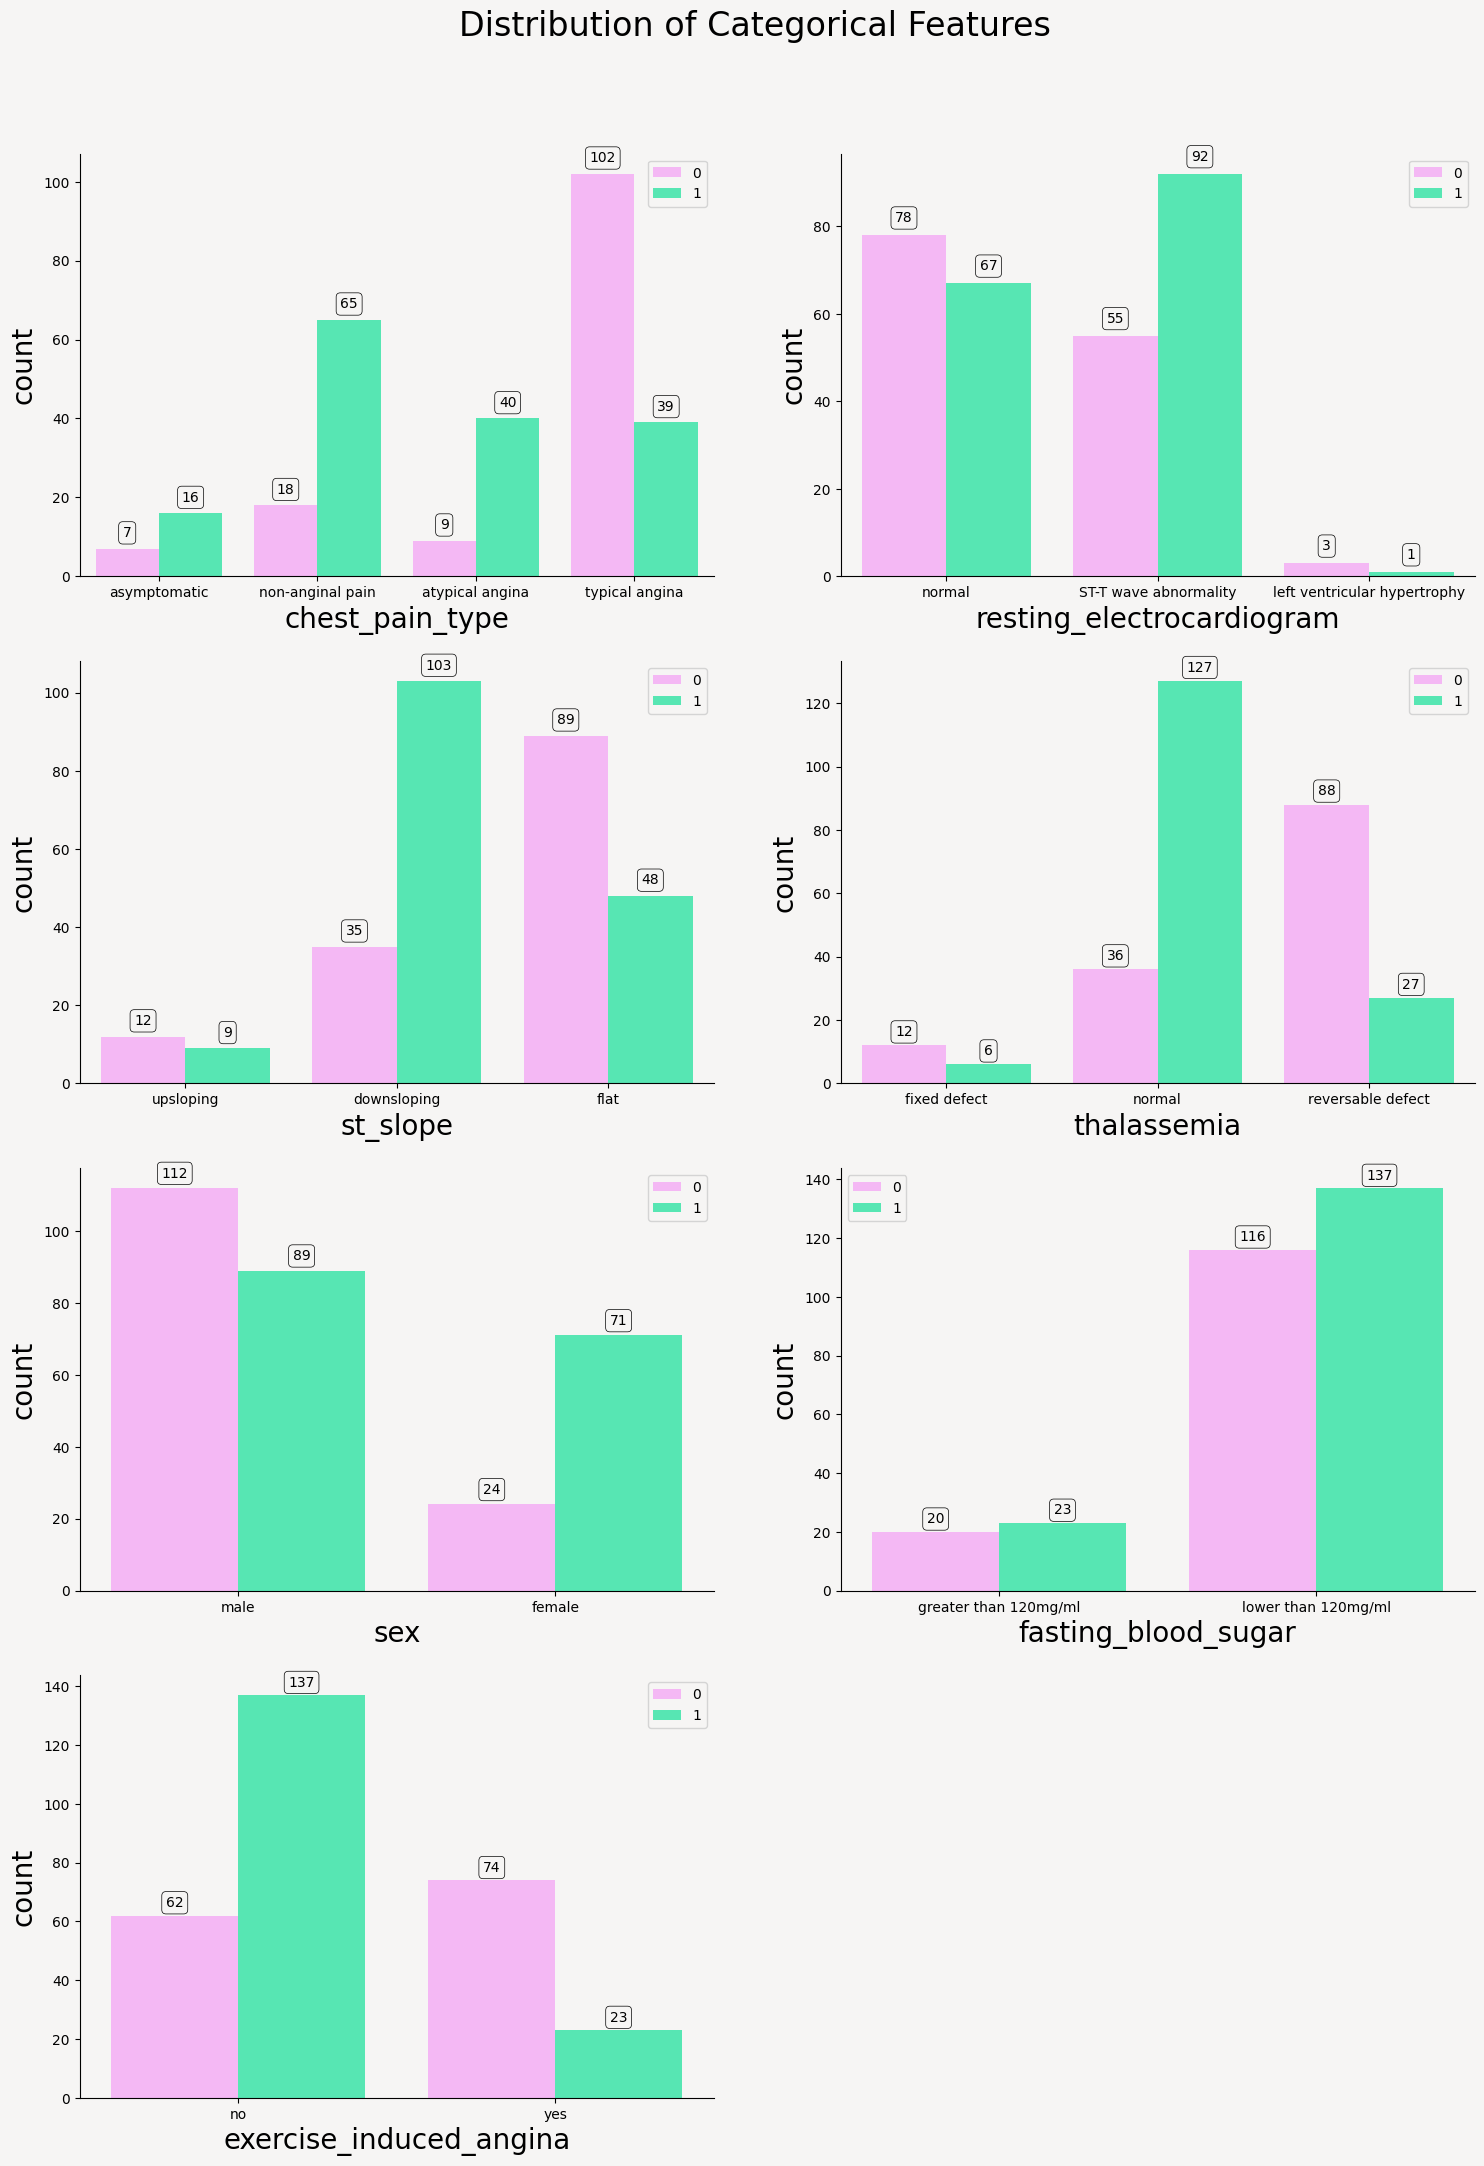

In [16]:
def count_plot(data, cat_feats):
    L = len(cat_feats)
    ncol = 2
    nrow = int(np.ceil(L / ncol))
    remove_last = (nrow * ncol) - L

    fig, ax = plt.subplots(nrow, ncol, figsize=(18, 24), facecolor="#F6F5F4")
    fig.subplots_adjust(top=0.92)
    ax.flat[-remove_last].set_visible(False)

    i = 1
    for col in cat_feats:
        plt.subplot(nrow, ncol, i, facecolor="#F6F5F4")
        ax = sns.countplot(data=data, x=col, hue="target", palette=mypal[1::4])
        ax.set_xlabel(col, fontsize=20)
        ax.set_ylabel("count", fontsize=20)
        sns.despine(right=True)
        sns.despine(offset=0, trim=False)
        plt.legend(facecolor="#F6F5F4")

        for p in ax.patches:
            height = p.get_height()
            ax.text(
                p.get_x() + p.get_width() / 2.0,
                height + 3,
                "{:1.0f}".format((height)),
                ha="center",
                bbox=dict(
                    facecolor="none", edgecolor="black", boxstyle="round", linewidth=0.5
                ),
            )

        i = i + 1

    plt.suptitle("Distribution of Categorical Features", fontsize=24)
    return 0


count_plot(data, cat_feats[0:-1])

##  1.4 **相关性热图** <a class="anchor" id="1.4"></a>

相关性热图是一个有用的工具，可以图形化地表示两个特征如何相互关联。根据特征的数据类型，我们需要使用适当的相关系数计算方法。例如，皮尔森相关系数，点二列相关，克莱默V相关等。

### 1.4.1 皮尔森相关

* 皮尔森相关系数 ― 是两组数据之间线性相关的度量。它是两个变量的协方差和它们的标准差的乘积之间的比率；因此，它本质上是协方差的标准化测量，这样结果总是在-1和1之间。（[参考](https://en.wikipedia.org/wiki/Pearson_correlation_coefficient)）

Text(0.5, 1.05, "Numerical features correlation (Pearson's)")

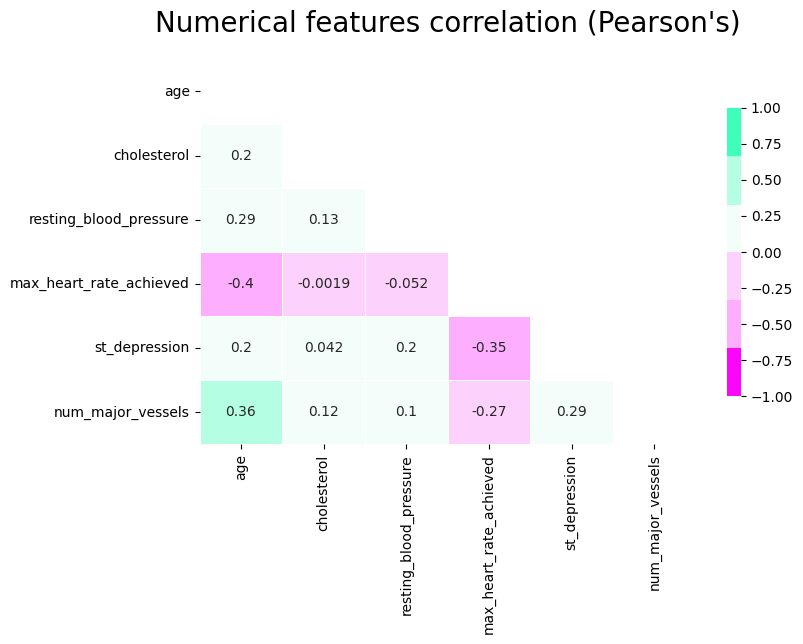

In [17]:
df_ = data[num_feats]
corr = df_.corr(method="pearson")
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(8, 5), facecolor=None)
cmap = sns.color_palette(mypal, as_cmap=True)
sns.heatmap(
    corr,
    mask=mask,
    cmap=cmap,
    vmax=1.0,
    vmin=-1.0,
    center=0,
    annot=True,
    square=False,
    linewidths=0.5,
    cbar_kws={"shrink": 0.75},
)
ax.set_title("Numerical features correlation (Pearson's)", fontsize=20, y=1.05)

### 1.4.2 点-双列相关
- 点-双列相关用于测量**一个连续变量和一个二分类变量**之间关联的强度和方向。它是皮尔森积差相关的一个特例，皮尔森积差相关应用于你有两个连续变量的情况，而在这种情况下，其中一个变量是以二分类尺度进行测量的[[参考](https://statistics.laerd.com/spss-tutorials/point-biserial-correlation-using-spss-statistics.php)]。

Text(0.5, 1.05, 'Cont feats vs target correlation (point-biserial)')

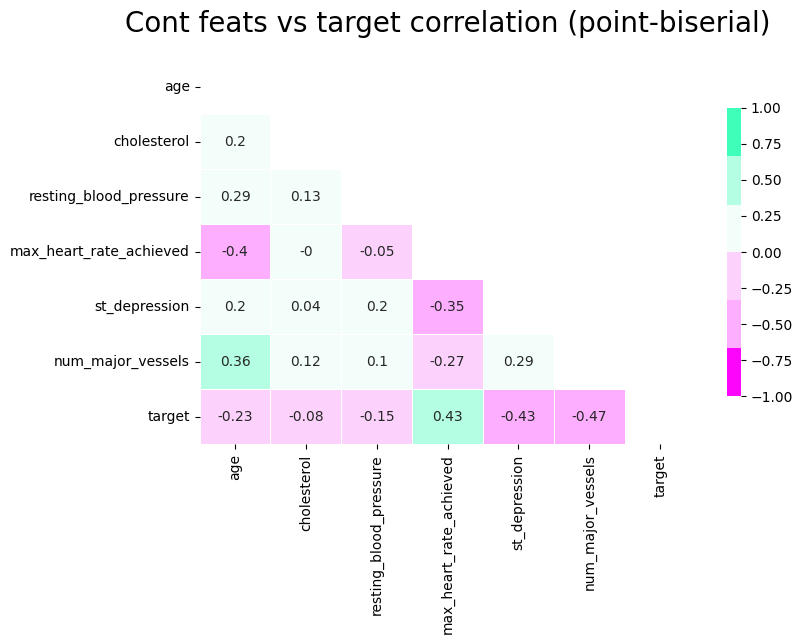

In [18]:
feats_ = [
    "age",
    "cholesterol",
    "resting_blood_pressure",
    "max_heart_rate_achieved",
    "st_depression",
    "num_major_vessels",
    "target",
]


def point_biserial(x, y):
    pb = stats.pointbiserialr(x, y)
    return pb[0]


rows = []
for x in feats_:
    col = []
    for y in feats_:
        pbs = point_biserial(data[x], data[y])
        col.append(round(pbs, 2))
    rows.append(col)

pbs_results = np.array(rows)
DF = pd.DataFrame(pbs_results, columns=data[feats_].columns, index=data[feats_].columns)

mask = np.triu(np.ones_like(DF, dtype=bool))
corr = DF.mask(mask)

f, ax = plt.subplots(figsize=(8, 5), facecolor=None)
cmap = sns.color_palette(mypal, as_cmap=True)
sns.heatmap(
    corr,
    mask=mask,
    cmap=cmap,
    vmax=1.0,
    vmin=-1,
    center=0,
    annot=True,
    square=False,
    linewidths=0.5,
    cbar_kws={"shrink": 0.75},
)
ax.set_title("Cont feats vs target correlation (point-biserial)", fontsize=20, y=1.05)

### 1.4.3 克莱默V相关

* 在统计学中，克莱默的V是衡量**两个名义变量**之间关联的度量，给出一个介于0和+1（包含）之间的值。它基于皮尔森的卡方统计量，并由哈拉尔德·克莱默在1946年发布。[[参考](https://en.wikipedia.org/wiki/Cram%C3%A9r%27s_V)]

In [ ]:
# the cramers_v function is copied from https://towardsdatascience.com/the-search-for-categorical-correlation-a1cf7f1888c9


def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = stats.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k - 1) * (r - 1)) / (n - 1))
    rcorr = r - ((r - 1) ** 2) / (n - 1)
    kcorr = k - ((k - 1) ** 2) / (n - 1)
    return np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))


# calculate the correlation coefficients using the above function
data_ = data[cat_feats]
rows = []
for x in data_:
    col = []
    for y in data_:
        cramers = cramers_v(data_[x], data_[y])
        col.append(round(cramers, 2))
    rows.append(col)

cramers_results = np.array(rows)
df = pd.DataFrame(cramers_results, columns=data_.columns, index=data_.columns)

# color palette
mypal_1 = [
    "#FC05FB",
    "#FEAEFE",
    "#FCD2FC",
    "#F3FEFA",
    "#B4FFE4",
    "#3FFEBA",
    "#FC05FB",
    "#FEAEFE",
    "#FCD2FC",
]
# plot the heat map
mask = np.triu(np.ones_like(df, dtype=bool))
corr = df.mask(mask)
f, ax = plt.subplots(figsize=(10, 6), facecolor=None)
cmap = sns.color_palette(mypal_1, as_cmap=True)
sns.heatmap(
    corr,
    mask=mask,
    cmap=cmap,
    vmax=1.0,
    vmin=0,
    center=0,
    annot=True,
    square=False,
    linewidths=0.01,
    cbar_kws={"shrink": 0.75},
)
ax.set_title("Categorical Features Correlation (Cramer's V)", fontsize=20, y=1.05)

<a href="#top">☝️ Back to top</a>

## **1.5 EDA总结**：<a class="anchor" id="1.5"></a>

* 数据大小：303行和14列（13个自变量+一个目标变量）>在删除错误的数据点后，数据量减少到了296！
* 数据没有缺失值
* 特征（列）数据类型：
    * 六个特征是数值型的
    * 其余的（七个特征）是类别变量
* 目标变量相当平衡，54%的人没有疾病，46%的人有疾病
* 相关性：
    * 特征之间的相关性最强
    * 在数值特征中，`num_major_vessels`，`max_heart_rate_achieved`和`st_depression`与目标变量有合理的相关性，相关系数分别为-0.47，0.43和-0.43。
    * 在类别特征中，`chest_pain_type`，`num_major_vessels`，`thalassemia`和`exercise_induced_angina`与目标变量的相关性较好，其中`thalassemia`最高，为0.52。
    * 胆固醇（令我惊讶，但我知道吗？）与心脏病的相关性较小。

**主要观察**：具有较高预测能力的特征可能是**`chest_pain_type`，`num_major_vessels`，`thalassemia`，`exercise_induced_angina` `max_heart_rate_achieved`** 和 **`st_depression`**。我们将看到哪些特征将由分类模型显示为重要。

---
# 2. **预测** <a class="anchor" id="2"></a>
---
**注意** : 我们只有297个案例（在数据清理后），这是一个非常小的数据量，不足以进行任何严肃的预测。因此，任何得出的结论都必须谨慎对待。这个笔记本仅仅是一个二元分类算法的练习。

## 2.1 **Scikit Learn 分类器** <a class="anchor" id="2.1"></a>

这是一个二分类问题（有疾病或无疾病的情况）。Scikit learn提供了广泛的分类算法，通常是大多数/传统的机器学习挑战的起点，所以我们首先从sklearn库中探索一些分类算法，如`逻辑回归`，`最近邻居`，`支持向量`，`Nu SVC`，`决策树`，`随机森林`，`AdaBoost`，`梯度提升`，`朴素贝叶斯`，`线性判别分析`，`二次判别分析`和`神经网络`。让我们首先使用上述的机器学习算法建立简单的模型，然后我们通过调整参数来优化它们。

In [20]:
from sklearn.discriminant_analysis import (
    LinearDiscriminantAnalysis,
    QuadraticDiscriminantAnalysis,
)
from sklearn.ensemble import (
    AdaBoostClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier,
)
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.metrics import (
    ConfusionMatrixDisplay,
    accuracy_score,
    auc,
    classification_report,
    confusion_matrix,
    recall_score,
    roc_curve,
)
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier

In [21]:
def label_encode_cat_features(data, cat_features):
    """
    Given a dataframe and its categorical features, this function returns label-encoded dataframe
    """

    label_encoder = LabelEncoder()
    data_encoded = data.copy()

    for col in cat_features:
        data_encoded[col] = label_encoder.fit_transform(data[col])

    data = data_encoded

    return data


def score_summary(names, classifiers):
    """
    Given a list of classiers, this function calculates the accuracy,
    ROC_AUC and Recall and returns the values in a dataframe
    """

    cols = ["Classifier", "Accuracy", "ROC_AUC", "Recall", "Precision", "F1"]
    data_table = pd.DataFrame(columns=cols)

    for name, clf in zip(names, classifiers):
        clf.fit(X_train, y_train)

        pred = clf.predict(X_val)
        accuracy = accuracy_score(y_val, pred)

        pred_proba = clf.predict_proba(X_val)[:, 1]

        fpr, tpr, thresholds = roc_curve(y_val, pred_proba)
        roc_auc = auc(fpr, tpr)

        # confusion matric, cm
        cm = confusion_matrix(y_val, pred)

        # recall: TP/(TP+FN)
        recall = cm[1, 1] / (cm[1, 1] + cm[1, 0])

        # precision: TP/(TP+FP)
        precision = cm[1, 1] / (cm[1, 1] + cm[0, 1])

        # F1 score: TP/(TP+FP)
        f1 = 2 * recall * precision / (recall + precision)

        df = pd.DataFrame(
            [[name, accuracy * 100, roc_auc, recall, precision, f1]], columns=cols
        )
        # data_table = data_table.append(df)
        data_table = pd.concat([data_table, df], ignore_index=True)

    return np.round(data_table.reset_index(drop=True), 2)


def plot_conf_matrix(names, classifiers, nrows, ncols, fig_a, fig_b):
    """
    Plots confusion matrices in a subplots.

    Args:
        names : list of names of the classifier
        classifiers : list of classification algorithms
        nrows, ncols : number of rows and rows in the subplots
        fig_a, fig_b : dimensions of the figure size
    """

    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(fig_a, fig_b))

    i = 0
    for clf, ax in zip(classifiers, axes.flatten()):
        clf.fit(X_train, y_train)
        ConfusionMatrixDisplay.from_estimator(clf, X_val, y_val, ax=ax)  # , ax_=ax
        ax.title.set_text(names[i])
        i = i + 1

    plt.tight_layout()
    plt.show()


def roc_auc_curve(names, classifiers):
    """
    Given a list of classifiers, this function plots the ROC curves

    """
    plt.figure(figsize=(12, 8))

    for name, clf in zip(names, classifiers):
        clf.fit(X_train, y_train)

        pred_proba = clf.predict_proba(X_val)[:, 1]

        fpr, tpr, thresholds = roc_curve(y_val, pred_proba)
        roc_auc = auc(fpr, tpr)

        plt.plot(fpr, tpr, lw=3, label=name + " ROC curve (area = %0.2f)" % (roc_auc))
        plt.plot([0, 1], [0, 1], color="navy", lw=1, linestyle="--")
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.0])
        plt.xlabel("False Positive Rate")
        plt.ylabel("True Positive Rate")
        plt.title("Receiver operating characteristic (ROC) curves", fontsize=20)
        plt.legend(loc="lower right")

In [22]:
# split the data into train and test sets

cat_features = cat_feats
data = label_encode_cat_features(data, cat_features)

seed = 0
test_size = 0.3

features = data.columns[:-1]

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data[num_feats] = scaler.fit_transform(data[num_feats])


X = data[features]
y = data["target"]


X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=test_size, random_state=seed
)

### 2.1.1 性能度量

有几个度量可以用来衡量给定分类算法的性能。选择'*合适的*'度量依赖于我们处理的问题类型。在某些情况下，例如，*准确性*可能是正确的选择，在其他某些情况下，*召回率*或*精确度*可能更适合目的。因为我们正在处理医学案例（分类一个案例是否为心脏病阳性或阴性），我们可以使用召回率（真阳性率或敏感性）作为性能度量选择我们的分类器。请注意，我们不希望将阳性（有病）的情况分类为阴性（无病）。

**混淆矩阵**：混淆矩阵（也称为错误矩阵）是一种特定的表格布局，可以可视化监督学习算法的性能。矩阵的每一行代表*实际*类别的实例，而每一列代表*预测*类别的实例 [[wiki](https://en.wikipedia.org/wiki/Confusion_matrix)]。下表是一个二分类的混淆矩阵示例，可以从中推导出其他术语/度量。下面描述了一些度量。

<div>    
<img src="https://miro.medium.com/max/875/1*LQ1YMKBlbDhH9K6Ujz8QTw.jpeg" width="350", align="center"/>  
</div>

[图片来源 >>](https://towardsdatascience.com/demystifying-confusion-matrix-29f3037b0cfa)

---

**关键词**: 

|**术语** |**含义** | **描述**| 
| --- |---|---|
|TP |真阳性|预测为阳性的阳性情况|
|FP |假阳性|预测为阳性的阴性情况|
|TN |真阴性|预测为阴性的阴性情况|
|FN |假阴性|预测为阴性的阳性情况|

---
**准确性** : 衡量模型正确识别/预测的案例有多少，即正确预测除以总样本量。

$\frac{TP + TN}{TP +TN + FP + FN}$

**召回率**: 测量*真阳性*的率，即模型将*实际*阳性案例*识别/预测*为阳性的情况有多少。

$\frac{TP}{(TP + FN)}$

**精确度**: 测量预测为阳性的案例中实际上有多少是阳性的。

$\frac{TP}{(TP + FP)}$

**F1-分数** : 结合了模型的精确度和召回率，定义为模型的精确度和召回率的调和平均值。

$2\frac{recall * precision}{recall + precision}$

**ROC曲线** : 接收者操作特征（ROC）曲线，是一个图形绘图，说明了二分类算法的性能作为真阳性率和假阳性率的函数。

<a href="#top">☝️ 回到顶部</a>

### 2.1.2 逻辑回归

In [23]:
model = LogisticRegression()
model.fit(X_train, y_train)

pred = model.predict(X_val)
accuracy = accuracy_score(y_val, pred)

pred_proba = model.predict_proba(X_val)[:, 1]

fpr, tpr, thresholds = roc_curve(y_val, pred_proba)
roc_auc = auc(fpr, tpr)

# confusion matric, cm
cm = confusion_matrix(y_val, pred)

# recall: TP/(TP+FN)
recall = cm[1, 1] / (cm[1, 1] + cm[1, 0])

# precision: TP/(TP+FP)
precision = cm[1, 1] / (cm[1, 1] + cm[0, 1])

# F1 score: TP/(TP+FP)
f1 = 2 * recall * precision / (recall + precision)
# print(roc_auc, cm, recall, f1)

$$										
\begin{aligned}
ln \frac{p}{1-p} = & 4.50 -0.16 *age -1.57 * sex -0.73 cp -0.33 trestbps \\
& -0.30 chol -0.12 fbs -0.08 restecg + 0.55 thalach\\
& -0.70 exang -0.40 oldpeak -0.27 slope -1.24 ca \\
&-0.84 thal
\end{aligned}
$$

[[ 0.         -1.11659919 -0.63396787 -0.14369234 -0.0997295   0.
  -0.04512903  0.40911611 -0.36207741 -0.42977006  0.         -0.96850773
  -0.61511322]]


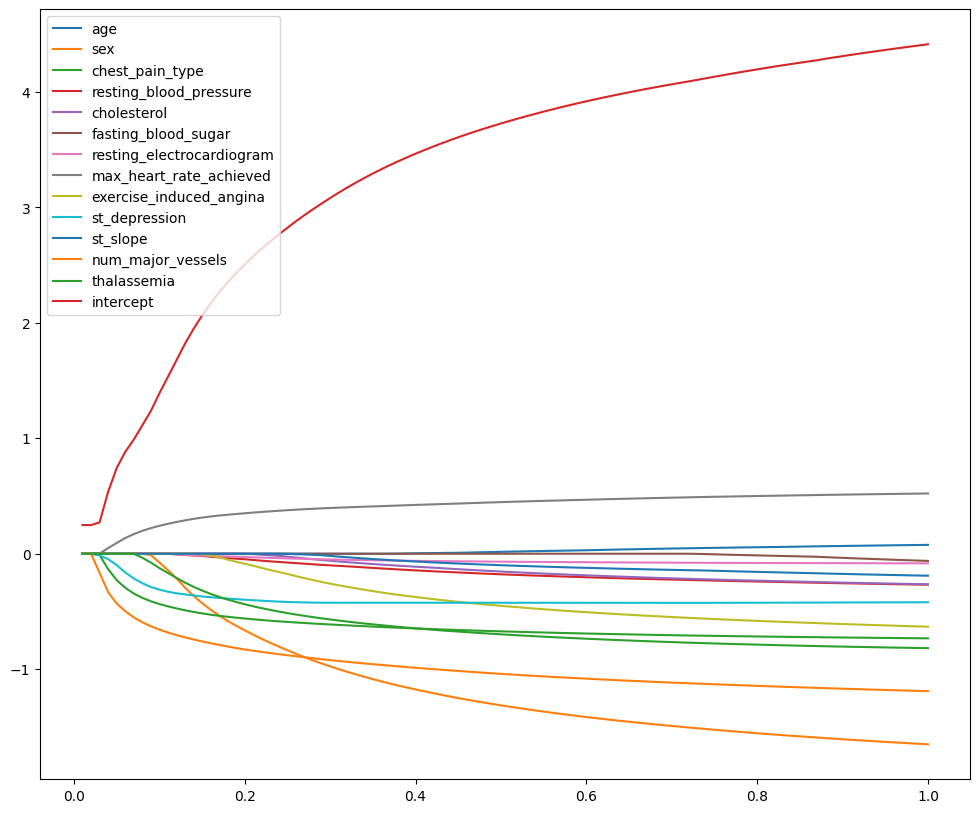

In [24]:
num = 100
model = LogisticRegressionCV(
    penalty="l1", solver="saga", Cs=[(i + 1) / num for i in range(num)]
)
model.fit(X_train, y_train)

coefs_paths_ = model.coefs_paths_[1].mean(axis=0)
plt.figure(figsize=(12, 10))
plt.plot(
    model.Cs_,
    coefs_paths_,
    label=[
        "age",
        "sex",
        "chest_pain_type",
        "resting_blood_pressure",
        "cholesterol",
        "fasting_blood_sugar",
        "resting_electrocardiogram",
        "max_heart_rate_achieved",
        "exercise_induced_angina",
        "st_depression",
        "st_slope",
        "num_major_vessels",
        "thalassemia",
        "intercept",
    ],
)
plt.legend()

print(model.coef_)

### 2.1.3 Performance metrics summary table

In [25]:
# classifier algorithms with default parameters

names = [
    "Logistic Regression",
    "Nearest Neighbors",
    "Support Vectors",
    "Nu SVC",
    "Decision Tree",
    "Random Forest",
    "AdaBoost",
    "Gradient Boosting",
    "Naive Bayes",
    "Linear DA",
    "Quadratic DA",
    "Neural Net",
]

classifiers = [
    LogisticRegression(solver="liblinear", random_state=seed),
    KNeighborsClassifier(2),
    SVC(probability=True, random_state=seed),
    NuSVC(probability=True, random_state=seed),
    DecisionTreeClassifier(random_state=seed),
    RandomForestClassifier(random_state=seed),
    AdaBoostClassifier(random_state=seed),
    GradientBoostingClassifier(random_state=seed),
    GaussianNB(),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis(),
    MLPClassifier(random_state=seed),
]

In [26]:
(
    score_summary(names, classifiers)
    .sort_values(by="Accuracy", ascending=False)
    .style.background_gradient(cmap="coolwarm")
    .bar(
        subset=[
            "ROC_AUC",
        ],
        color="#6495ED",
    )
    .bar(subset=["Recall"], color="#ff355d")
    .bar(subset=["Precision"], color="lightseagreen")
    .bar(subset=["F1"], color="gold")
)

,Classifier,Accuracy,ROC_AUC,Recall,Precision,F1
2,Support Vectors,84.270000,0.900000,0.930000,0.790000,0.850000
3,Nu SVC,84.270000,0.900000,0.930000,0.790000,0.850000
6,AdaBoost,84.270000,0.900000,0.890000,0.810000,0.850000
0,Logistic Regression,83.150000,0.900000,0.910000,0.780000,0.840000
8,Naive Bayes,83.150000,0.920000,0.890000,0.800000,0.840000
10,Quadratic DA,83.150000,0.890000,0.840000,0.820000,0.830000
11,Neural Net,83.150000,0.900000,0.910000,0.780000,0.840000
7,Gradient Boosting,82.020000,0.900000,0.890000,0.780000,0.830000
9,Linear DA,82.020000,0.910000,0.860000,0.790000,0.830000
5,Random Forest,80.900000,0.910000,0.860000,0.780000,0.820000


### 2.1.4 ROC curves

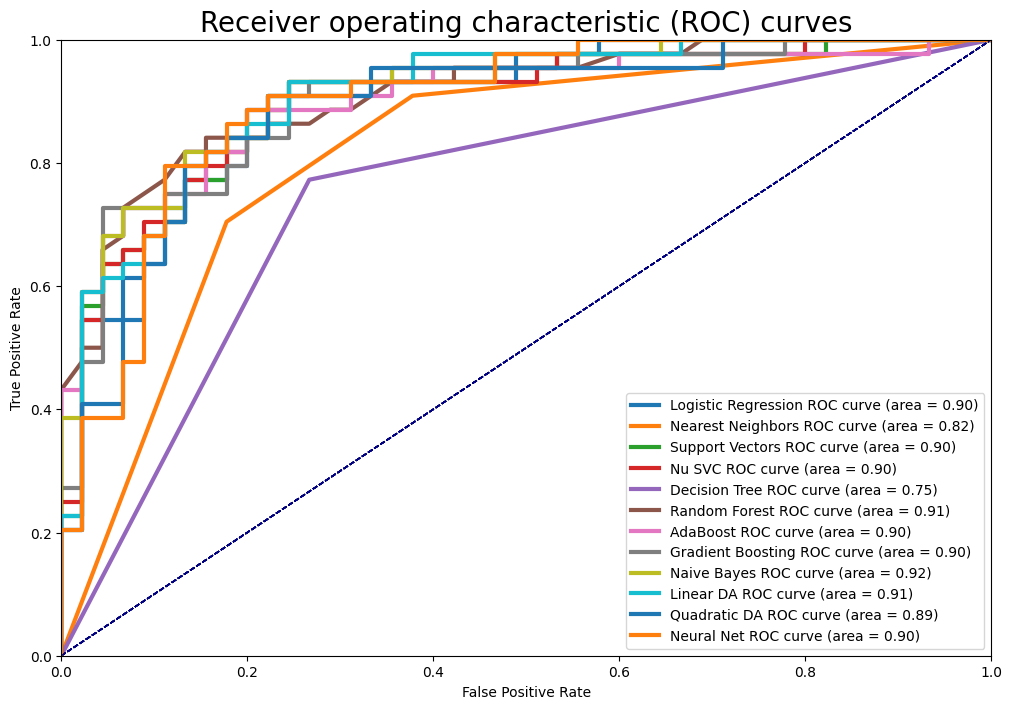

In [27]:
roc_auc_curve(names, classifiers)

### 2.1.5 结果

现在我们已经看到了分类器的所有性能度量，是时候为我们选择最佳的分类算法了。基于精确度，LR排名第一（86%）；然而，如果我们看召回率，神经网络排名第一，为94%。在精确度的情况下，QDA排名第一，为85%。所以我们该选择哪一个呢？F1-分数可以在召回率和精确度之间给我们一个平衡。LR恰好有最好的F1-分数，所以我们选择逻辑回归作为我们最好的分类器。

**注意**：如果我正在为一家做心脏病筛查测试的诊所提供咨询，我希望在精确度和召回率之间达到完美的平衡（我不希望诊所因为给出太多假阳性结果而冒着损害声誉的风险，但也不希望他们冒着预测出太多假阴性而冒着损害客户健康的风险）。因此，我会建议他们选择给出较高F1-分数的模型，即逻辑回归模型。

---
# 3. **结论性陈述** <a class="anchor" id="3"></a>
---
在这个笔记本的开始，我们阐述了我们想要用这个项目做什么；探索心脏病数据集（EDA）并练习二分类（建模）。在第一部分（EDA）中，我们确实探索了数据集，进行了理智检查，删除了一些'错误'的数据和其他预处理。我们还试图找出特征之间以及与目标变量之间的相关性。在第二部分中，我们学习了如何设置二分类器；首先是使用LASSO（L1-范数）选择重要变量的最初的逻辑回归模型。最后，我们将模型与其他常用的分类模型进行了比较。

## **笔记本结束！** 

<blockquote style="margin-right:auto; margin-left:auto; color:white; background-color: #4e4e4e; padding: 1em; margin:24px;">

<font color="white" size=+1.0><b>感谢你的阅读！</b></font> 
    
<font color="white" size=+1.0><b>如果你有任何反馈或评论，请告诉我。</b></font> 
    
</blockquote>

<a href="#top">☝️ 回到顶部</a>